In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/Gaurang Vaghela/OneDrive/Desktop/Dataset/StudentsPerformance.csv")
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df['test preparation course'] = df['test preparation course'].replace(to_replace='none',value=None)

In [5]:
df.isnull().sum()

gender                           0
race/ethnicity                   0
parental level of education      0
lunch                            0
test preparation course        642
math score                       0
reading score                    0
writing score                    0
dtype: int64

In [6]:
df['test preparation course'] = df['test preparation course'].fillna(value='Incomplete')

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,Incomplete,90,95,93
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44
4,male,group C,some college,standard,Incomplete,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,Incomplete,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


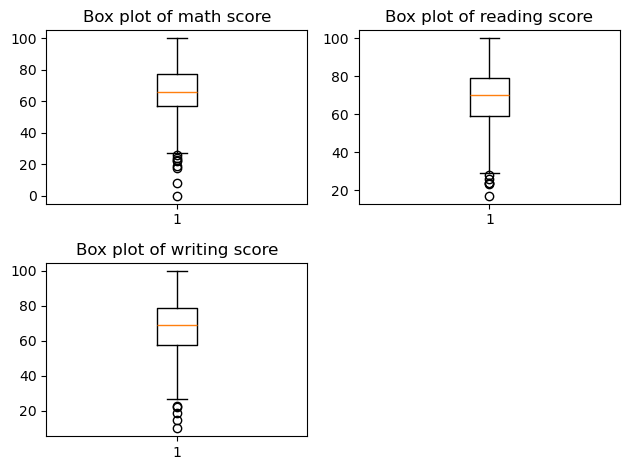

In [8]:
def showOutliers():
    for i, col in enumerate(['math score', 'reading score', 'writing score']):
        plt.subplot(2, 2, i+1)
        plt.boxplot(df[col])
        plt.title(f'Box plot of {col}')
    plt.tight_layout()
    plt.show()
showOutliers()

In [9]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5*IQR
    upper_bound = q3 + 1.5*IQR
    df = df[(df[col]>=lower_bound)&(df[col]<=upper_bound)]

df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,Incomplete,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,Incomplete,90,95,93
3,male,group A,associate's degree,free/reduced,Incomplete,47,57,44
4,male,group C,some college,standard,Incomplete,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,Incomplete,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


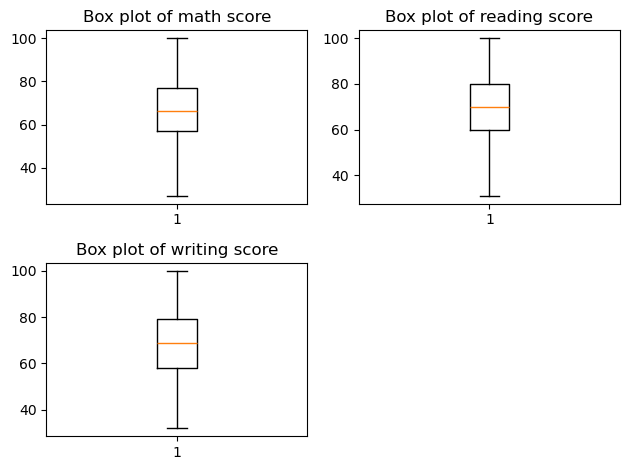

In [10]:
showOutliers()

In [11]:
df['math score'].skew()

-0.02597374258403439

In [12]:
df.describe()

,math score,reading score,writing score
count,986.000000,986.000000,986.000000
mean,66.694726,69.723124,68.648073
std,14.340780,13.910716,14.427092
min,27.000000,31.000000,32.000000
25%,57.000000,60.000000,58.000000
50%,66.500000,70.000000,69.000000
75%,77.000000,80.000000,79.000000
max,100.000000,100.000000,100.000000


<Axes: xlabel='math score', ylabel='Density'>

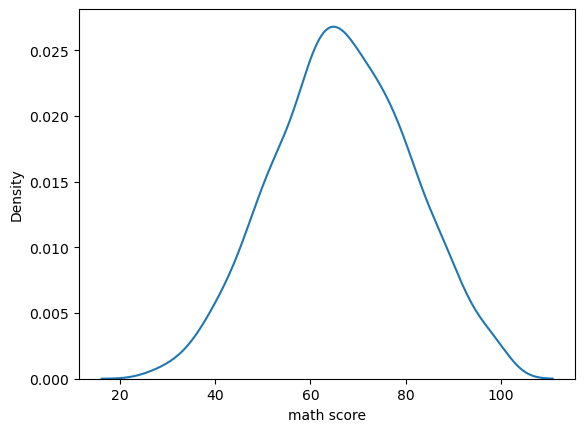

In [13]:
sns.kdeplot(df['math score'])

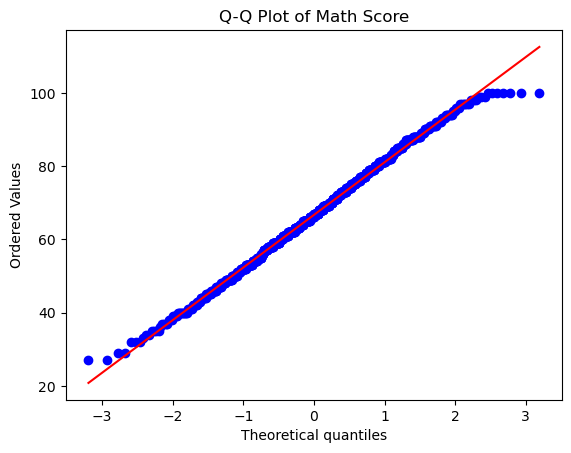

In [14]:
import scipy.stats as stats

# Q-Q Plot
stats.probplot(df['math score'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Math Score")
plt.show()